
#### M12_Challenge_KonradK_credit_risk_resampling.ipynb
# Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
---

# Credit Risk Classification


In [1]:
# # Import the modules
# import numpy as np
# import pandas as pd
# from pathlib import Path
# from sklearn.metrics import balanced_accuracy_score
# from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced

# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the sba_loans.csv file from the Resources folder into a Pandas DataFrame
loans_df = pd.read_csv(
    Path("./Resources/lending_data.csv")
)

# Review the DataFrame
loans_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = loans_df['loan_status']

# Separate the X variable, the features
X = loans_df.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# ORIGINAL: Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# # Import the train_test_learn module
# from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# # Import the LogisticRegression module from SKLearn
# from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_original_model = logistic_regression_model.fit(X_train, y_train)

lr_original_model

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
y_original_pred = lr_original_model.predict(X_test)

### Step 3: Evaluate the Original Model’s performance by carrying out the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_original_pred)

0.9520479254722232

In [11]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_original_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [12]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, y_original_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.91      1.00      0.95      0.91     18765
          1       0.85      0.91      0.99      0.88      0.95      0.90       619

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
# WRITE YOUR ANSWER HERE! # WRITE YOUR ANSWER HERE!

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# # Import the RandomOverSampler module form imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled =  random_oversampler.fit_resample(X_train, y_train)

In [14]:
# RESAMPLED: Count the distinct values of the resampled labels data
y_resampled.value_counts()

1    56271
0    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [15]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_resampled_model = logistic_regression_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
y_resampled_pred = lr_resampled_model.predict(X_test)

### Step 3: Evaluate the Resampled Model’s performance by carrying out the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, y_resampled_pred)

0.9936781215845847

In [17]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_resampled_pred)

array([[18649,   116],
       [    4,   615]], dtype=int64)

In [18]:
# Print the classification report for the model
print(classification_report_imbalanced(y_test, y_resampled_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.99     18765
          1       0.84      0.99      0.99      0.91      0.99      0.99       619

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



---
---
---
---

In [19]:
# ORIGINAL: Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [20]:
# RESAMPLED: Count the distinct values of the resampled labels data
y_resampled.value_counts()

1    56271
0    56271
Name: loan_status, dtype: int64

---

In [21]:
# ORIGINAL: Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_original_pred)

0.9520479254722232

In [22]:
# RESAMPLED: Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, y_resampled_pred)

0.9936781215845847

---

In [23]:
# ORIGINAL: Generate a confusion matrix for the model
confusion_matrix(y_test, y_original_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [24]:
# RESAMPLED: Generate a confusion matrix for the model
confusion_matrix(y_test, y_resampled_pred)

array([[18649,   116],
       [    4,   615]], dtype=int64)

---

In [25]:
# ORIGINAL: Classification Report for the original data
print(classification_report_imbalanced(y_test, y_original_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.91      1.00      0.95      0.91     18765
          1       0.85      0.91      0.99      0.88      0.95      0.90       619

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



In [26]:
# RESAMPLED: Classification Report for the resampled data
print(classification_report_imbalanced(y_test, y_resampled_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.99      1.00      0.99      0.99     18765
          1       0.84      0.99      0.99      0.91      0.99      0.99       619

avg / total       0.99      0.99      0.99      0.99      0.99      0.99     19384



---

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
# YOUR ANSWER HERE! # WRITE YOUR ANSWER HERE! # WRITE YOUR ANSWER HERE!

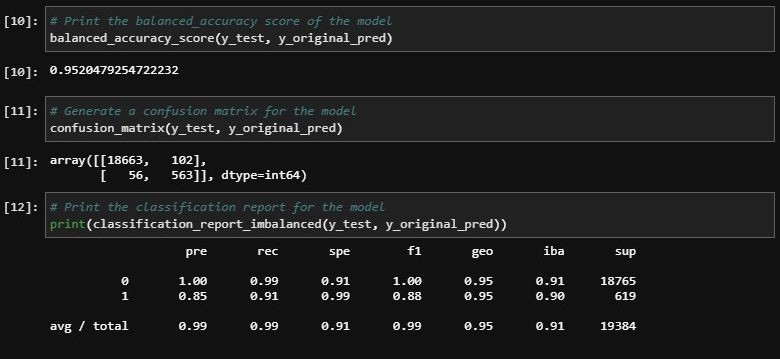

Link to the [CREDIT RISK ANALYSIS REPORT](https://github.com/sfkonrad/M12_Challenge_Submission#credit-risk-analysis-report)